## Pneumonia detection from chest X-rays using Deep Learning ##

The risk of pneumonia is immense for many, especially in developing nations where billions face energy poverty and rely on polluting forms of energy. The WHO estimates that over 4 million premature deaths occur annually from household air pollution-related diseases including pneumonia. Over 150 million people get infected with pneumonia on an annual basis especially children under 5 years old. In such regions, the problem can be further aggravated due to the dearth of medical resources and personnel. For example, in Africa’s 57 nations, a gap of 2.3 million doctors and nurses exists. For these populations, accurate and fast diagnosis means everything. It can guarantee timely access to treatment and save much needed time and money for those already experiencing poverty.

### The Challenge ##

Build an algorithm to automatically identify whether a patient is suffering from pneumonia or not by looking at chest X-ray images. The algorithm had to be extremely accurate because lives of people is at stake.

### Environment and Tools ###

- scikit-learn
- keras
- numpy
- pandas
- matplotlib

### Data ###

 Dataset Name     : Chest X-Ray Images (Pneumonia) <br /> 
 Dataset Link     : Chest X-Ray Images (Pneumonia) Dataset ([Kaggle](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)) <br /> 
 Original Paper   : Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning
                   (Daniel S. Kermany, Michael Goldbaum, Wenjia Cai, M. Anthony Lewis, Huimin Xia, Kang Zhang)
                   https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5 <br /> 

### Code: ###

In [1]:
# importing libraries
import os
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


### Building the custom CNN model: ###

Detected Pneumonia from Chest X-Ray images using Custom Deep Convololutional Neural Network. 


#### Model Architecture: ####

> 1. The model is built on Convolution-Pooling layers set back to back.
> 2. All the convolution layer have 32 filters with a (3*3) filter formation.
> 3. The weights are initialized uniformly and rectified linear ('relu') activation function is used.
> 4. Pooling layers of pool size (2*2) is used after each convolution operation.
> 5. Post Flattening the layers, two more dense layers are added with 256 nodes with rectified linear activation function.
> 6. Final layer with a single node and a probabilistic 'sigmoid' activation function is used.
> 7. The model is then compiled using 'adam' optimizer with 'binary_crossentropy' as the loss funtion and 'accuracy' as the metrics. 

In [2]:
#Building the CNN
classifier = Sequential()
classifier.add(Conv2D(32,3,3, kernel_initializer = 'uniform', activation = 'relu',  input_shape=(256, 256, 3)))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(32,3,3, kernel_initializer ='uniform', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 256, activation = 'relu', kernel_initializer = 'uniform'))
classifier.add(Dense(units = 256, activation = 'relu', kernel_initializer = 'uniform'))
classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\Sarthak\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_initializer="uniform", activation="relu", input_shape=(256, 256,...)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sarthak\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_initializer="uniform", activation="relu")`
  """


### Image Preprocessing: ###

Image augmentation artificially creates training images through different ways of processing or combination of multiple processing, such as random rotation, shifts, shear and flips, etc.

An augmented image generator can be easily created using ImageDataGenerator API in Keras. ImageDataGenerator generates batches of image data with real-time data augmentation. The most basic codes to create and configure ImageDataGenerator and train deep neural network with augmented images are as follows.

In [2]:
##Image augmentation
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
train_set = train_datagen.flow_from_directory(
    'C:/Users/eroysar/Downloads/Convolutional_Neural_Networks/chest_xray/train', target_size=(256, 256), batch_size=32, class_mode='binary')
test_set = test_datagen.flow_from_directory(
    'C:/Users/eroysar/Downloads/Convolutional_Neural_Networks/chest_xray/test', target_size=(256, 256), batch_size=32, class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Visualizing the data distribution of the two classes for both train and test datasets.

In [4]:
#count files in each category
train_normal_dir = 'C:/Users/eroysar/Downloads/Convolutional_Neural_Networks/chest_xray/train/NORMAL'
train_pneumonia_dir = 'C:/Users/eroysar/Downloads/Convolutional_Neural_Networks/chest_xray/train/PNEUMONIA'
test_normal_dir = 'C:/Users/eroysar/Downloads/Convolutional_Neural_Networks/chest_xray/test/NORMAL'
test_pneumonia_dir = 'C:/Users/eroysar/Downloads/Convolutional_Neural_Networks/chest_xray/test/PNEUMONIA'
list = os.listdir(train_normal_dir) # dir is your directory path
train_normal = len(list)

list = os.listdir(train_pneumonia_dir) # dir is your directory path
train_pneumonia = len(list)

list = os.listdir(test_normal_dir) # dir is your directory path
test_normal = len(list)

list = os.listdir(test_pneumonia_dir) # dir is your directory path
test_pneumonia = len(list)
print(train_normal, train_pneumonia, test_normal, test_pneumonia)

1342 3876 234 390


Text(0.5, 1.03, 'Test data')

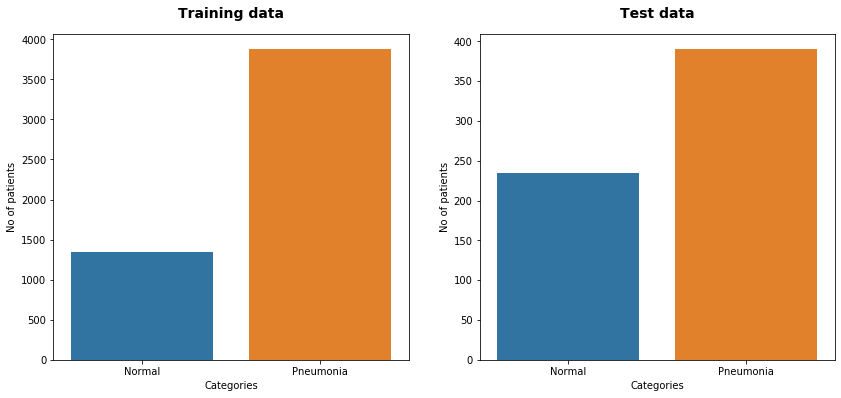

In [5]:
plt.figure(figsize = [14, 6])
plt.subplot(1, 2, 1)
g=sns.barplot(x = ['Normal','Pneumonia'], y = [train_normal, train_pneumonia])
g.set(xlabel='Categories', ylabel='No of patients')
plt.title('Training data', y=1.03, fontsize=14, fontweight='semibold')

plt.subplot(1, 2, 2)
g=sns.barplot(x = ['Normal','Pneumonia'], y = [test_normal, test_pneumonia])
g.set(xlabel='Categories', ylabel='No of patients')
plt.title('Test data', y=1.03, fontsize=14, fontweight='semibold')

#### Model Training: ####

In [5]:
classifier.fit_generator(train_set, samples_per_epoch=5216, nb_epoch=25, 
                         validation_data=test_set, nb_val_samples=800, steps_per_epoch= 5216)

C:\Users\Sarthak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """Entry point for launching an IPython kernel.
C:\Users\Sarthak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=163, epochs=25, validation_steps=800)`
  """Entry point for launching an IPython kernel.


Epoch 1/25
163/163 [==============================] - 1710s 10s/step - loss: 0.3691 - accuracy: 0.8292 - val_loss: 0.9187 - val_accuracy: 0.7949
Epoch 2/25
163/163 [==============================] - 1375s 8s/step - loss: 0.2309 - accuracy: 0.9087 - val_loss: 1.5654 - val_accuracy: 0.8093
Epoch 3/25
163/163 [==============================] - 1349s 8s/step - loss: 0.2121 - accuracy: 0.9183 - val_loss: 0.8927 - val_accuracy: 0.8077
Epoch 4/25
163/163 [==============================] - 1315s 8s/step - loss: 0.2021 - accuracy: 0.9193 - val_loss: 0.1179 - val_accuracy: 0.7869
Epoch 5/25
163/163 [==============================] - 1380s 8s/step - loss: 0.1805 - accuracy: 0.9308 - val_loss: 0.2804 - val_accuracy: 0.8926
Epoch 6/25
163/163 [==============================] - 1360s 8s/step - loss: 0.1759 - accuracy: 0.9327 - val_loss: 0.6627 - val_accuracy: 0.7917
Epoch 7/25
163/163 [==============================] - 1344s 8s/step - loss: 0.1477 - accuracy: 0.9442 - val_loss: 0.1218 - val_accuracy

#### Model Performance ####


After completing 25 epochs the model performance is listed below.

> Training set:
> Accuracy: 96.22%
> Loss: 10.33%


> Test set:
> Val_accuracy: 91.03%
> Val_loss: 46.61%